In [1]:
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from data_processor import DataProcessor
from regressor import Regressor

In [2]:
ds = xr.open_dataset("../data.grib")
t2m_numpy = ds.t2m.to_numpy() - 273.15  # -> C
sp_numpy = ds.sp.to_numpy() / 100       # -> hPa

data = np.stack((t2m_numpy, sp_numpy), axis=-1)
feature_list = [ds.t2m.name, ds.sp.name]

auto_seq_len = 5 # AUTOREG_SEQUENCE_LENGTH
fh = 1           # FORECASTING_HORIZON

processor = DataProcessor(data)
X, y = processor.preprocess(auto_seq_len, fh)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [3]:
X.shape, y.shape

((1076, 4, 25, 45, 2), (1076, 1, 25, 45, 2))

In [4]:
linearreg = Regressor(X.shape, fh, feature_list)
linearreg.train(X_train, y_train)

RMSE t2m: 1.954; R2 t2m: 0.437
RMSE sp: 2.101; R2 sp: 0.987


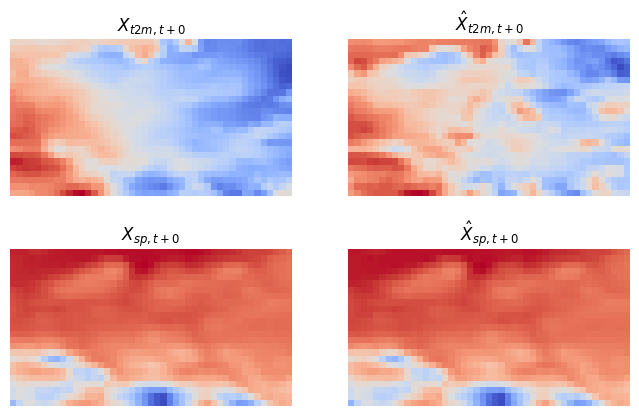

RMSE t2m: 1.478; R2 t2m: 0.632
RMSE sp: 2.438; R2 sp: 0.982


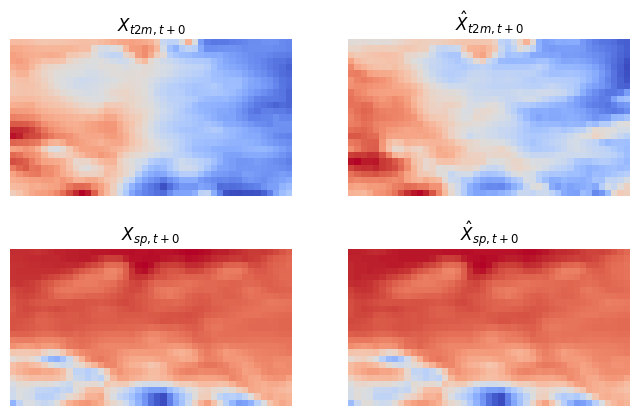

RMSE t2m: 2.694; R2 t2m: -1.065
RMSE sp: 1.304; R2 sp: 0.995


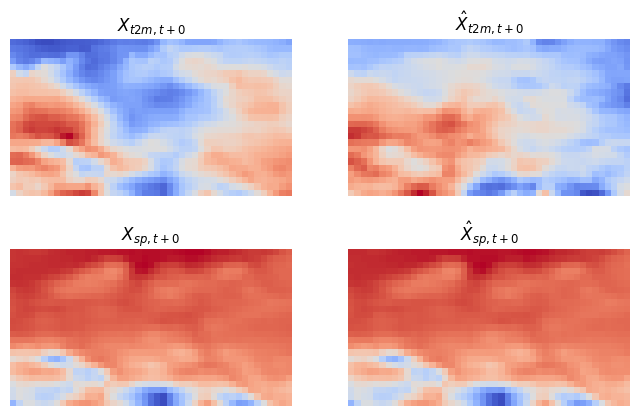

Evaluation metrics for entire test set:
RMSE t2m: 2.3255342460862694; R2 t2m: 0.7550311501289344
RMSE sp: 1.6327841444731248; R2 sp: 0.9933711372881605


In [5]:
_ = linearreg.predict_and_evaluate(X_test, y_test, limit=3)